In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\terrorism dataset\\archive\\suspects.csv')  

df

,suspect_ID,first_name,last_name,full_name,sex,age,marital_status,citizenship_status,last_residency_state,last_residency_country,...,military_target,awlaki_contact,foreign_militant_contact,online_radicalization,overseas_military_training,us_military_experience,suspect_status,date_charged,state_charged,state_charged2
0,1,Zacharias,Moussaoui,Zacharias Moussaoui,Male,33.0,Unmarried,Nonimmigrant Visa,NaN,NaN,...,No,NaN,Yes,No,Yes,No,Charged,12/11/2001,Virginia,NaN
1,2,Richard,Reid,Richard Reid,Male,28.0,Unmarried,Unknown,NaN,United Kingdom,...,No,NaN,Yes,No,Yes,No,Charged,12/23/2001,Massachusetts,NaN
2,3,John Walker,Lindh,John Walker Lindh,Male,20.0,Unmarried,US Born Citizen,Virginia,NaN,...,No,NaN,No,No,Yes,No,Charged,2/5/2002,Virginia,NaN
3,4,Ali,al-Marri,Ali al-Marri,Male,36.0,Married,Nonimmigrant Visa,Illinois,NaN,...,No,NaN,Yes,No,Yes,No,Charged,2/6/2002,Illinois,NaN
4,5,Imran,Mandhai,Imran Mandhai,Male,19.0,Unmarried,Permanent Resident,Florida,NaN,...,Yes,NaN,No,No,No,No,Charged,5/16/2002,Florida,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,394,Abdul Razak Ali,Artan,Abdul Razak Ali Artan,Male,18.0,Unmarried,Permanent Resident,Ohio,NaN,...,No,Ties,No,No,No,No,Deceased,NaN,NaN,NaN
392,395,Samy Mohammed,el-Goarany,Samy Mohammed El-Goarany,Male,24.0,Married,US Born Citizen,New York,Syria,...,No,Ties,Yes,Yes,Yes,No,Deceased,NaN,NaN,NaN
393,396,Saynab Abdirashid,Hussein,Saynab Abdirashid Hussein,Female,24.0,Unmarried,Permanent Resident,Minnesota,United States,...,No,NaN,Yes,No,No,No,Charged,8/28/2013,Minnesota,NaN
394,397,Lionel Nelson,Williams,Lionel Nelson Williams,Male,26.0,Unmarried,US Born Citizen,Virginia,United States,...,No,Ties,No,Yes,No,No,Charged,12/22/2016,Virginia,NaN


In [3]:
df.isnull().sum()

suspect_ID                      0
first_name                      0
last_name                       2
full_name                       0
sex                             0
age                            10
marital_status                  0
citizenship_status              0
last_residency_state           25
last_residency_country        372
plot_ID                        56
terror_plot                     0
terror_plot2                  390
informant_use                   0
public_tip                      0
family/community_tip            0
israel/judaism_target           0
military_target                 0
awlaki_contact                287
foreign_militant_contact        1
online_radicalization           0
overseas_military_training      1
us_military_experience          0
suspect_status                  0
date_charged                   46
state_charged                  40
state_charged2                392
dtype: int64

We are going to delete the columns which have very high number of null values 

In [7]:
df = df.drop(['last_residency_country','terror_plot2','state_charged2'],axis=1)

In [8]:
df.columns

Index(['suspect_ID', 'first_name', 'last_name', 'full_name', 'sex', 'age',
       'marital_status', 'citizenship_status', 'last_residency_state',
       'plot_ID', 'terror_plot', 'informant_use', 'public_tip',
       'family/community_tip', 'israel/judaism_target', 'military_target',
       'awlaki_contact', 'foreign_militant_contact', 'online_radicalization',
       'overseas_military_training', 'us_military_experience',
       'suspect_status', 'date_charged', 'state_charged'],
      dtype='object')

In [9]:
df.isnull().sum()

suspect_ID                      0
first_name                      0
last_name                       2
full_name                       0
sex                             0
age                            10
marital_status                  0
citizenship_status              0
last_residency_state           25
plot_ID                        56
terror_plot                     0
informant_use                   0
public_tip                      0
family/community_tip            0
israel/judaism_target           0
military_target                 0
awlaki_contact                287
foreign_militant_contact        1
online_radicalization           0
overseas_military_training      1
us_military_experience          0
suspect_status                  0
date_charged                   46
state_charged                  40
dtype: int64

We will convert the Nan values in the column 'awlaki_contact' as 'Not determined' 

In [11]:
df['awlaki_contact'].isnull()

0       True
1       True
2       True
3       True
4       True
       ...  
391    False
392    False
393     True
394    False
395     True
Name: awlaki_contact, Length: 396, dtype: bool

In [12]:
df['awlaki_contact']=df['awlaki_contact'].fillna('Not Determined')

In [13]:
df['awlaki_contact']

0      Not Determined
1      Not Determined
2      Not Determined
3      Not Determined
4      Not Determined
            ...      
391              Ties
392              Ties
393    Not Determined
394              Ties
395    Not Determined
Name: awlaki_contact, Length: 396, dtype: object

In the current dataset only 10 persons age is unavailable so we are going to put the mean value of the age of all the terrorist 

In [15]:
age_mean = df['age'].mean()
print(age_mean)

28.79015544041451


In [16]:
df['age'].fillna(age_mean,inplace=True) 

In [17]:
df['age'].isnull().sum()

0

In [18]:
df.drop(['first_name','last_name','full_name'],axis=1,inplace=True)

In [19]:
df.isnull().sum()

suspect_ID                     0
sex                            0
age                            0
marital_status                 0
citizenship_status             0
last_residency_state          25
plot_ID                       56
terror_plot                    0
informant_use                  0
public_tip                     0
family/community_tip           0
israel/judaism_target          0
military_target                0
awlaki_contact                 0
foreign_militant_contact       1
online_radicalization          0
overseas_military_training     1
us_military_experience         0
suspect_status                 0
date_charged                  46
state_charged                 40
dtype: int64

In [20]:
df['last_residency_state'].fillna('No information',inplace=True)

In [21]:
type(df['date_charged'])

pandas.core.series.Series

In [27]:
df['date_charged'] = pd.to_datetime(df['date_charged'])

In [28]:
df['date_charged'].dropna(inplace=True)

In [30]:
df.shape

(396, 21)

In [36]:
df['state_charged'].dropna(inplace=True,axis=0)

In [37]:
df.shape

(396, 21)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   suspect_ID                  396 non-null    int64         
 1   sex                         396 non-null    object        
 2   age                         396 non-null    float64       
 3   marital_status              396 non-null    object        
 4   citizenship_status          396 non-null    object        
 5   last_residency_state        396 non-null    object        
 6   plot_ID                     340 non-null    object        
 7   terror_plot                 396 non-null    object        
 8   informant_use               396 non-null    object        
 9   public_tip                  396 non-null    object        
 10  family/community_tip        396 non-null    object        
 11  israel/judaism_target       396 non-null    object        

In [40]:
df['overseas_military_training'].value_counts()

overseas_military_training
No     310
Yes     85
Name: count, dtype: int64

In [41]:
df['overseas_military_training'].fillna('No',inplace=True)

In [42]:
df['foreign_militant_contact'].value_counts()

foreign_militant_contact
No     263
Yes    132
Name: count, dtype: int64

In [43]:
df['foreign_militant_contact'].fillna('No',inplace=True)

In [44]:
df.drop('plot_ID',inplace=True,axis=1)

In [45]:
df.head()

,suspect_ID,sex,age,marital_status,citizenship_status,last_residency_state,terror_plot,informant_use,public_tip,family/community_tip,israel/judaism_target,military_target,awlaki_contact,foreign_militant_contact,online_radicalization,overseas_military_training,us_military_experience,suspect_status,date_charged,state_charged
0,1,Male,33.0,Unmarried,Nonimmigrant Visa,No information,2001 Zacarias Moussaoui,No,Yes,No,No,No,Not Determined,Yes,No,Yes,No,Charged,2001-12-11,Virginia
1,2,Male,28.0,Unmarried,Unknown,No information,2001 Shoe Bomber Plot,No,No,No,No,No,Not Determined,Yes,No,Yes,No,Charged,2001-12-23,Massachusetts
2,3,Male,20.0,Unmarried,US Born Citizen,Virginia,2001 John Walker Lindh,No,No,No,No,No,Not Determined,No,No,Yes,No,Charged,2002-02-05,Virginia
3,4,Male,36.0,Married,Nonimmigrant Visa,Illinois,2001 Ali al-Marri,No,No,No,No,No,Not Determined,Yes,No,Yes,No,Charged,2002-02-06,Illinois
4,5,Male,19.0,Unmarried,Permanent Resident,Florida,2002 South Florida Bomb Plot,Yes,No,Yes,Yes,Yes,Not Determined,No,No,No,No,Charged,2002-05-16,Florida


In [46]:
df.isnull().sum()

suspect_ID                     0
sex                            0
age                            0
marital_status                 0
citizenship_status             0
last_residency_state           0
terror_plot                    0
informant_use                  0
public_tip                     0
family/community_tip           0
israel/judaism_target          0
military_target                0
awlaki_contact                 0
foreign_militant_contact       0
online_radicalization          0
overseas_military_training     0
us_military_experience         0
suspect_status                 0
date_charged                  46
state_charged                 40
dtype: int64

In [47]:
df['state_charged'].value_counts()

state_charged
New York          68
Virginia          39
Minnesota         36
Florida           28
California        27
North Carolina    17
Ohio              14
Texas             14
New Jersey        13
Missouri          11
Illinois          11
Washington         9
Oregon             9
Massachusetts      9
Pennsylvania       8
Alabama            4
Colorado           4
Mississippi        4
Wisconsin          4
Arizona            4
Maryland           4
Kansas             3
Georgia            3
Michigan           3
Alaska             2
Kentucky           2
Arkansas           1
Connecticut        1
Oklahoma           1
Tennessee          1
South Carolina     1
Indiana            1
Name: count, dtype: int64

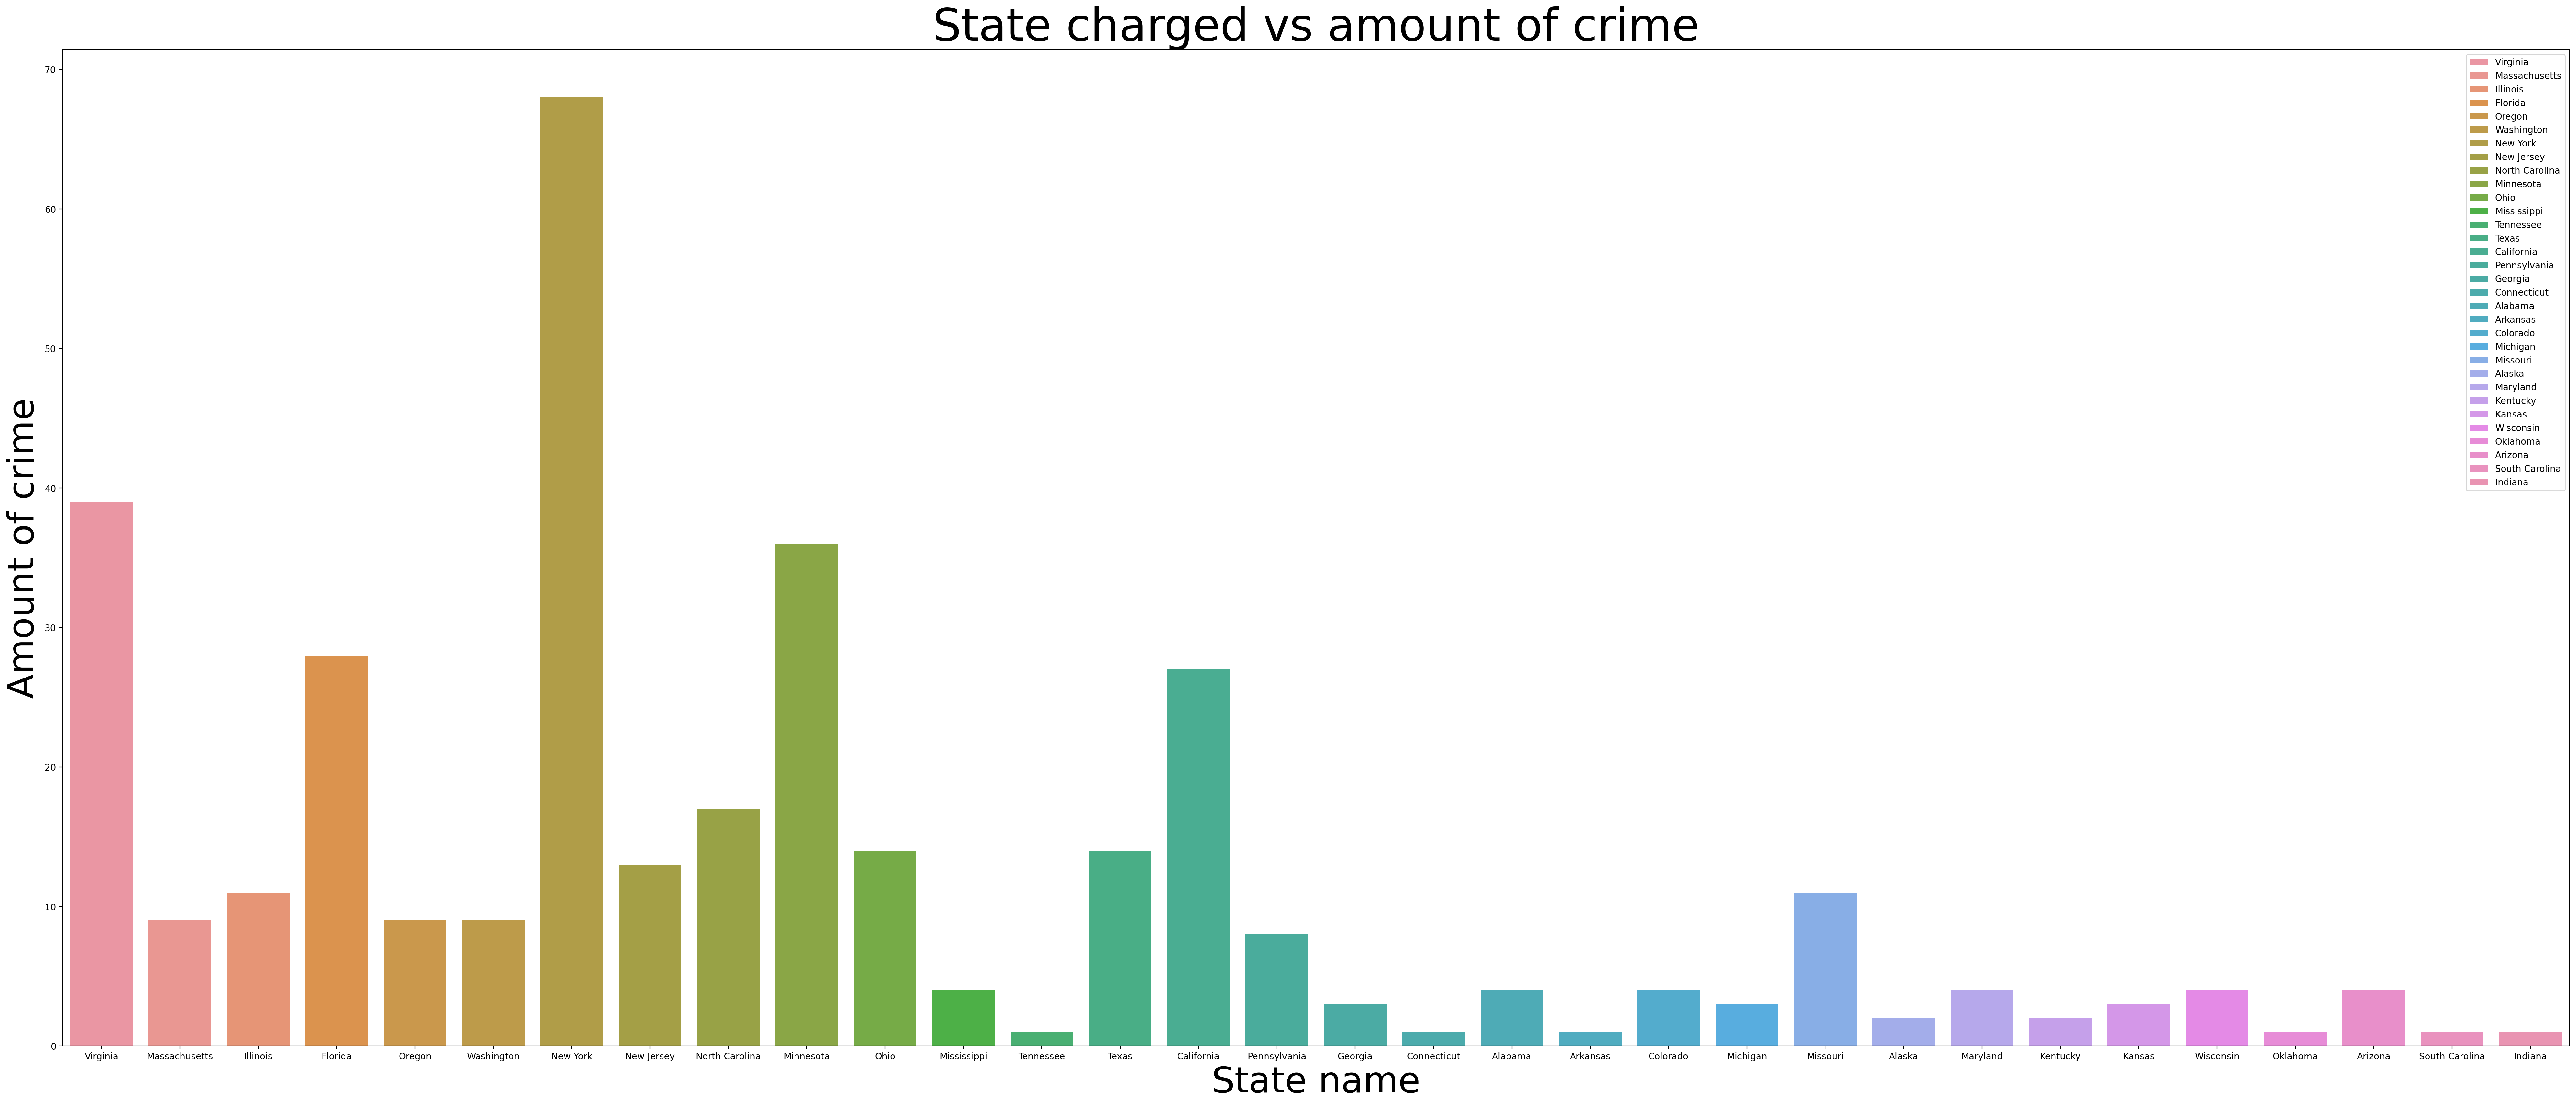

In [78]:
plt.figure(figsize=(50,20),dpi=200)

sns.countplot(x='state_charged',data=df,dodge=False,hue='state_charged')
plt.title('State charged vs amount of crime',fontsize=50)
plt.xlabel('State name',fontsize=40)
plt.ylabel('Amount of crime',fontsize=40)

plt.legend()
plt.show()

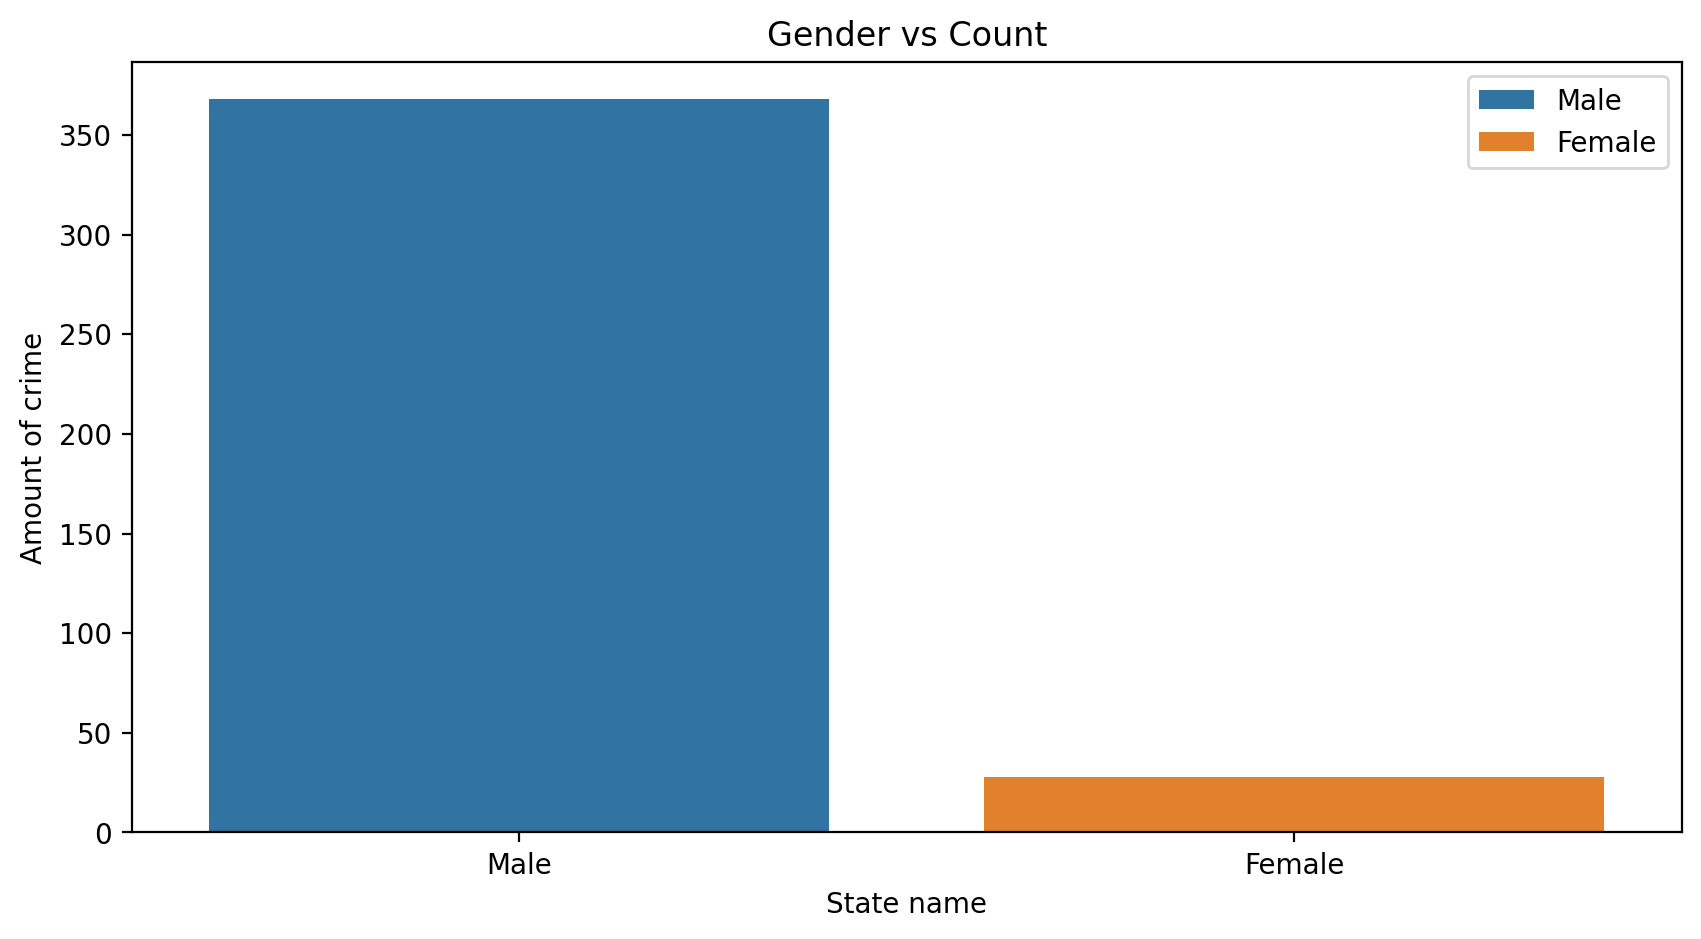

In [77]:
plt.figure(figsize=(10,5),dpi=200)

sns.countplot(x='sex',data=df,dodge=False,hue='sex')
plt.title('Gender vs Count')
plt.xlabel('State name')
plt.ylabel('Amount of crime')

plt.legend()
plt.show()

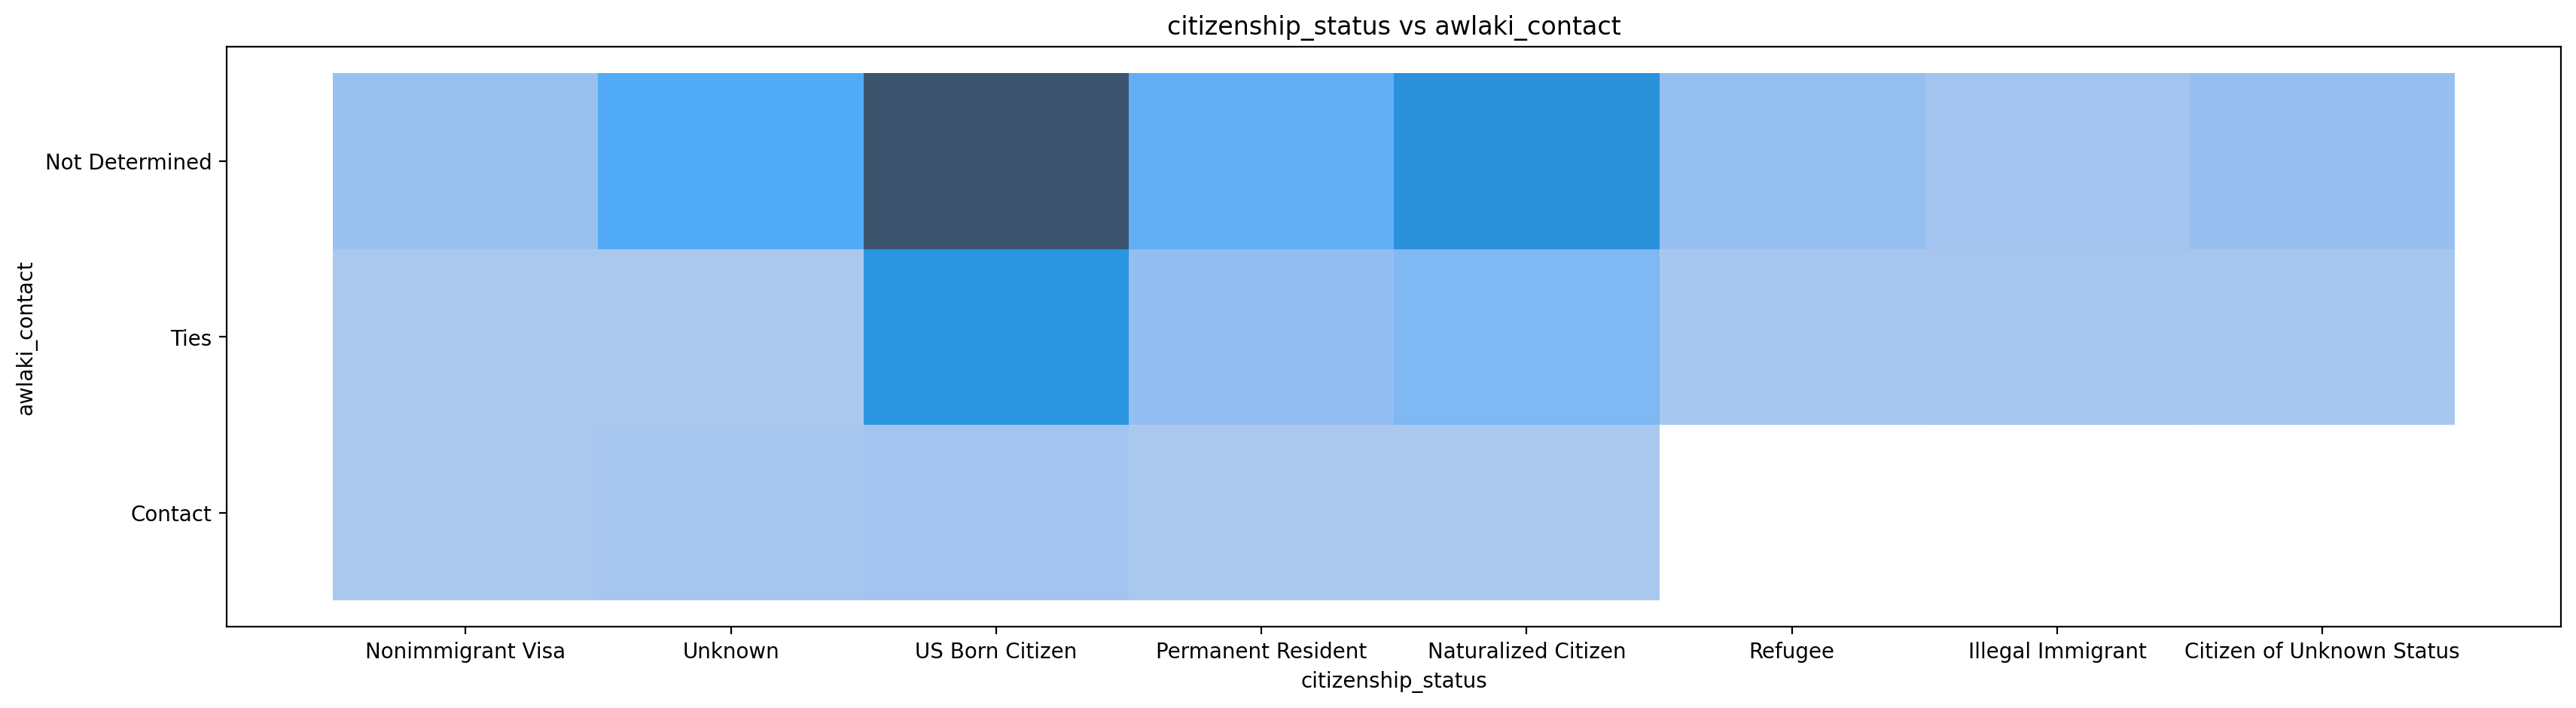

In [83]:
plt.figure(figsize=(20,5),dpi=200)

sns.histplot(y='awlaki_contact',x='citizenship_status',data=df)
plt.title('citizenship_status vs awlaki_contact')
plt.xlabel('citizenship_status')
plt.ylabel('awlaki_contact')

plt.show()

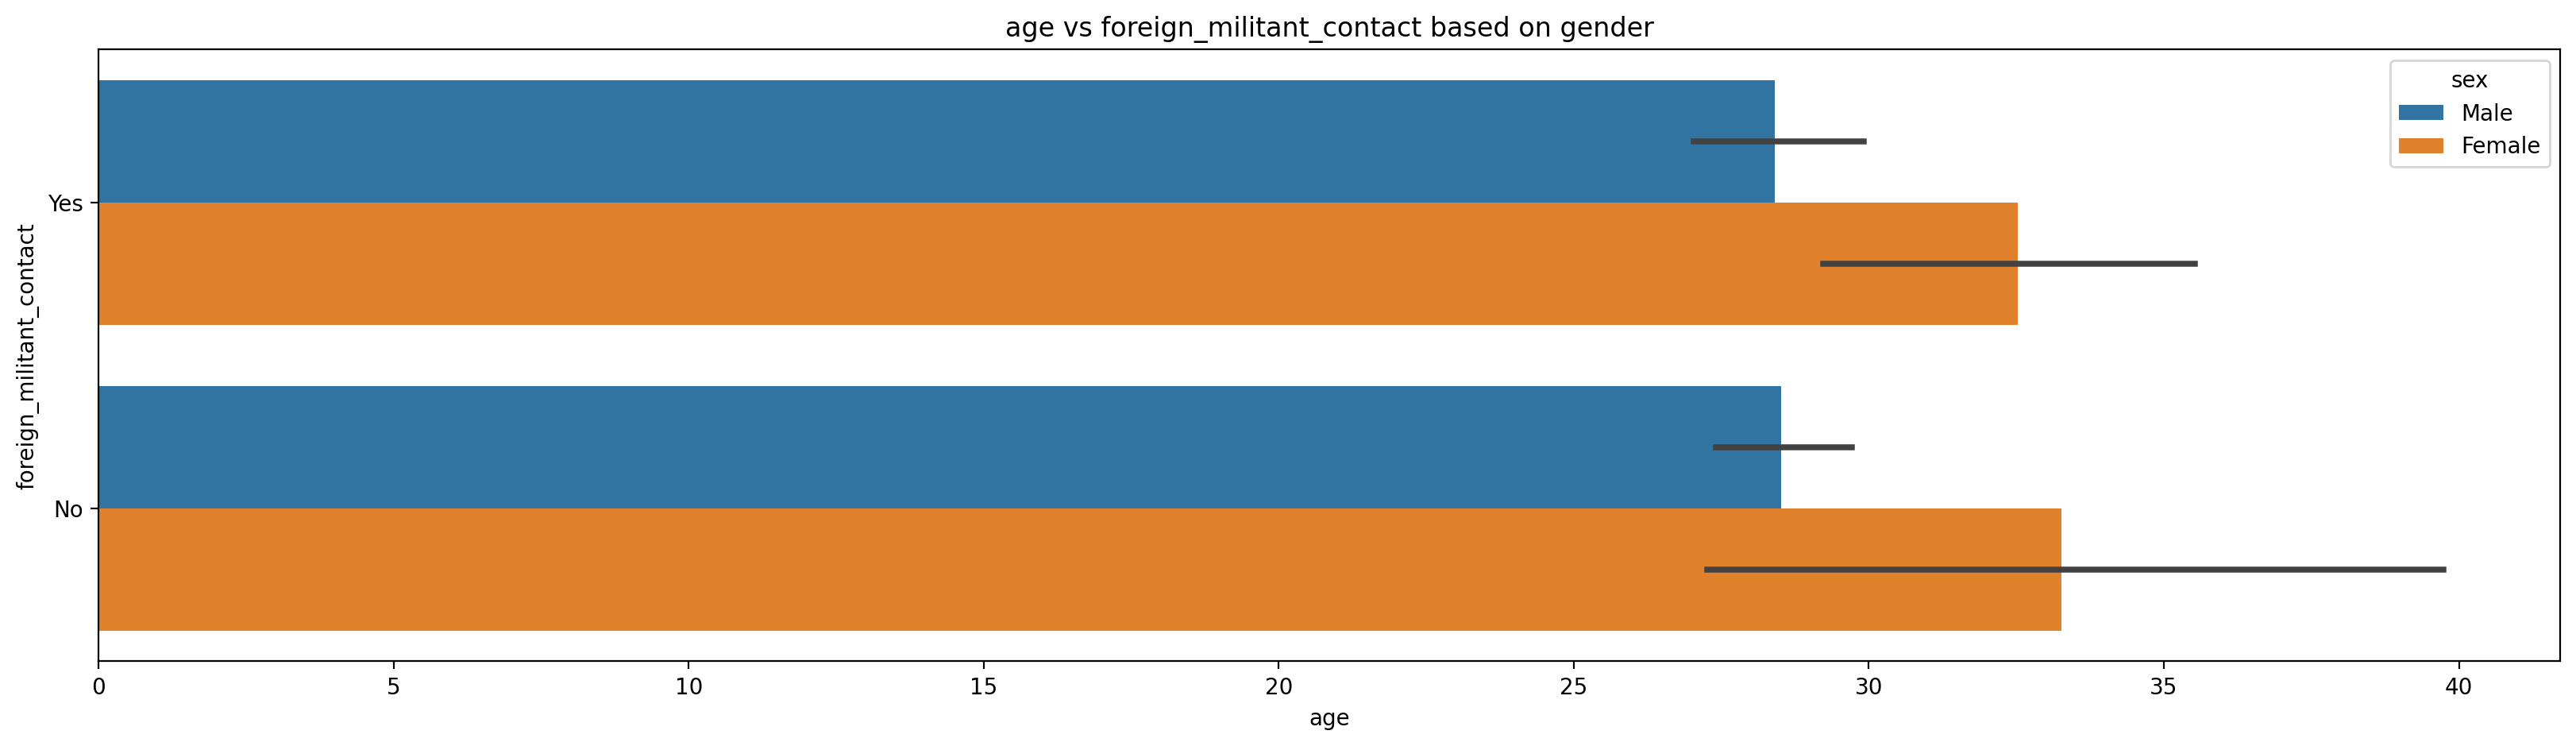

In [109]:
plt.figure(figsize=(20,5),dpi=200)
sns.barplot(x='age',y='foreign_militant_contact',data=df,hue='sex')
plt.title('age vs foreign_militant_contact based on gender')
plt.show()

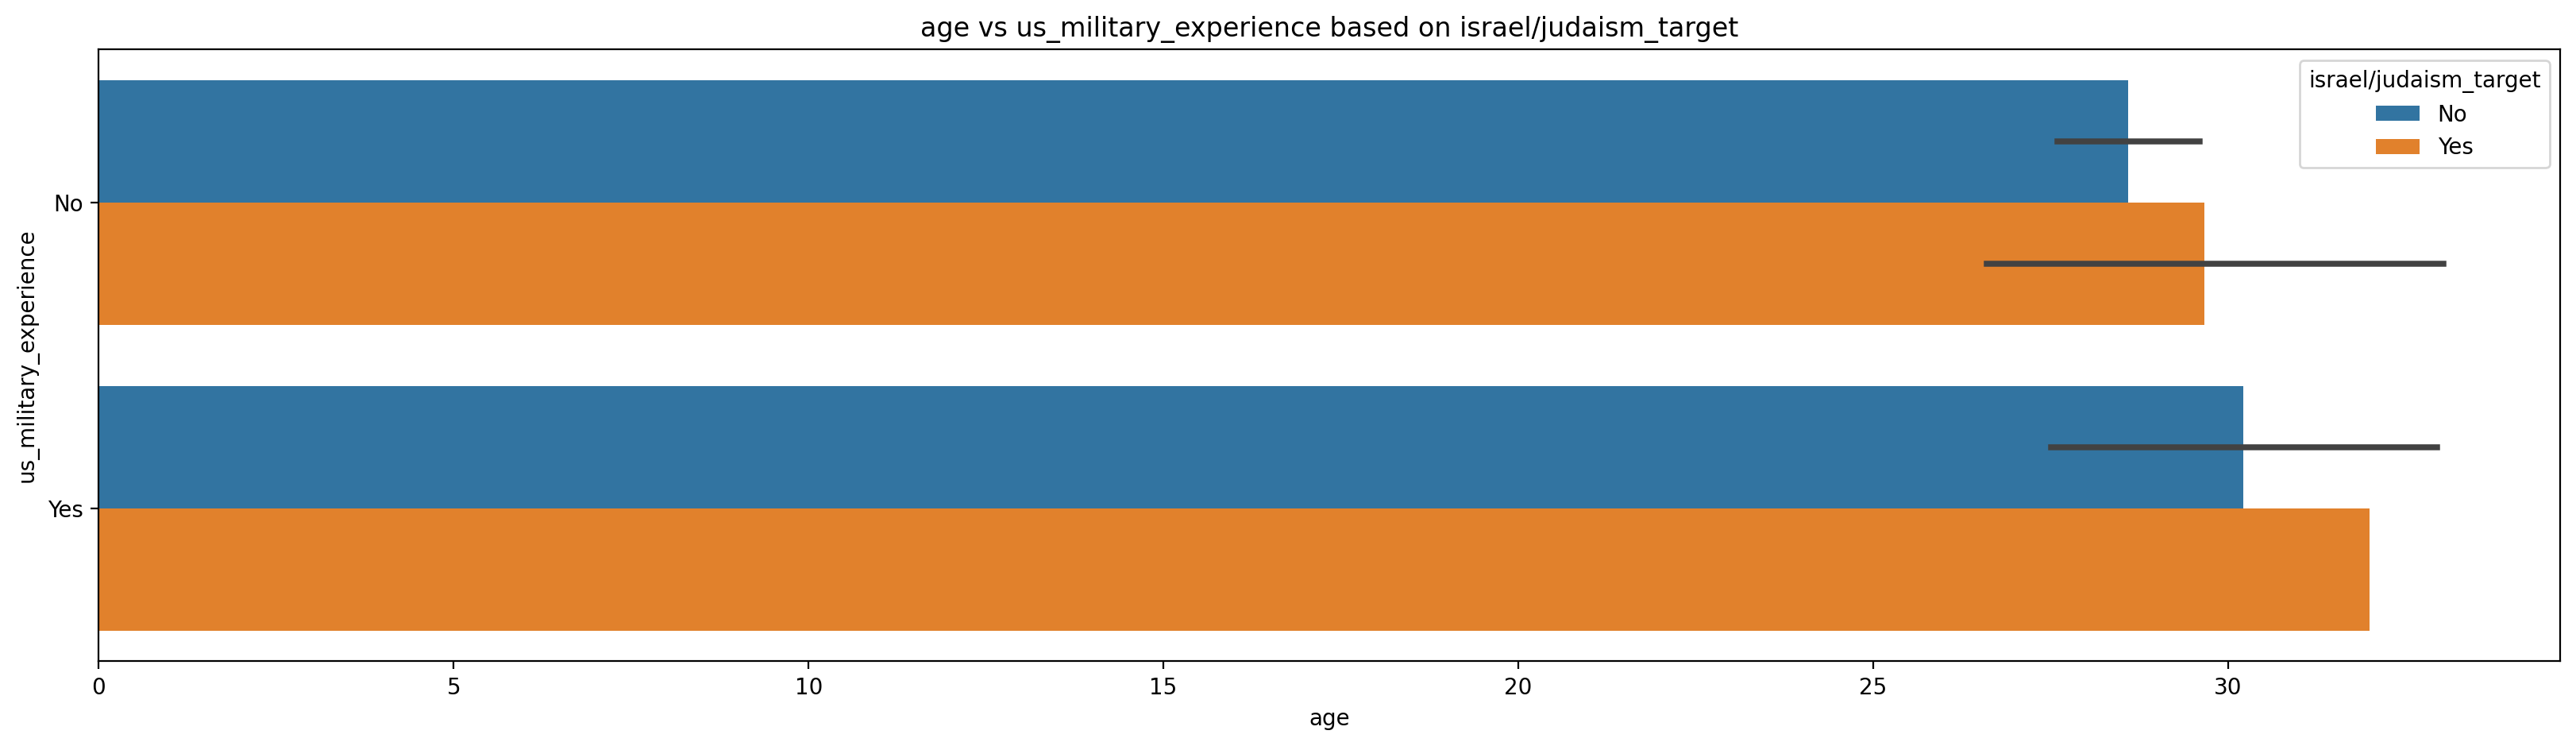

In [110]:
plt.figure(figsize=(20,5),dpi=200)
sns.barplot(x='age',y='us_military_experience',data=df,hue='israel/judaism_target')
plt.title('age vs us_military_experience based on israel/judaism_target')
plt.show()

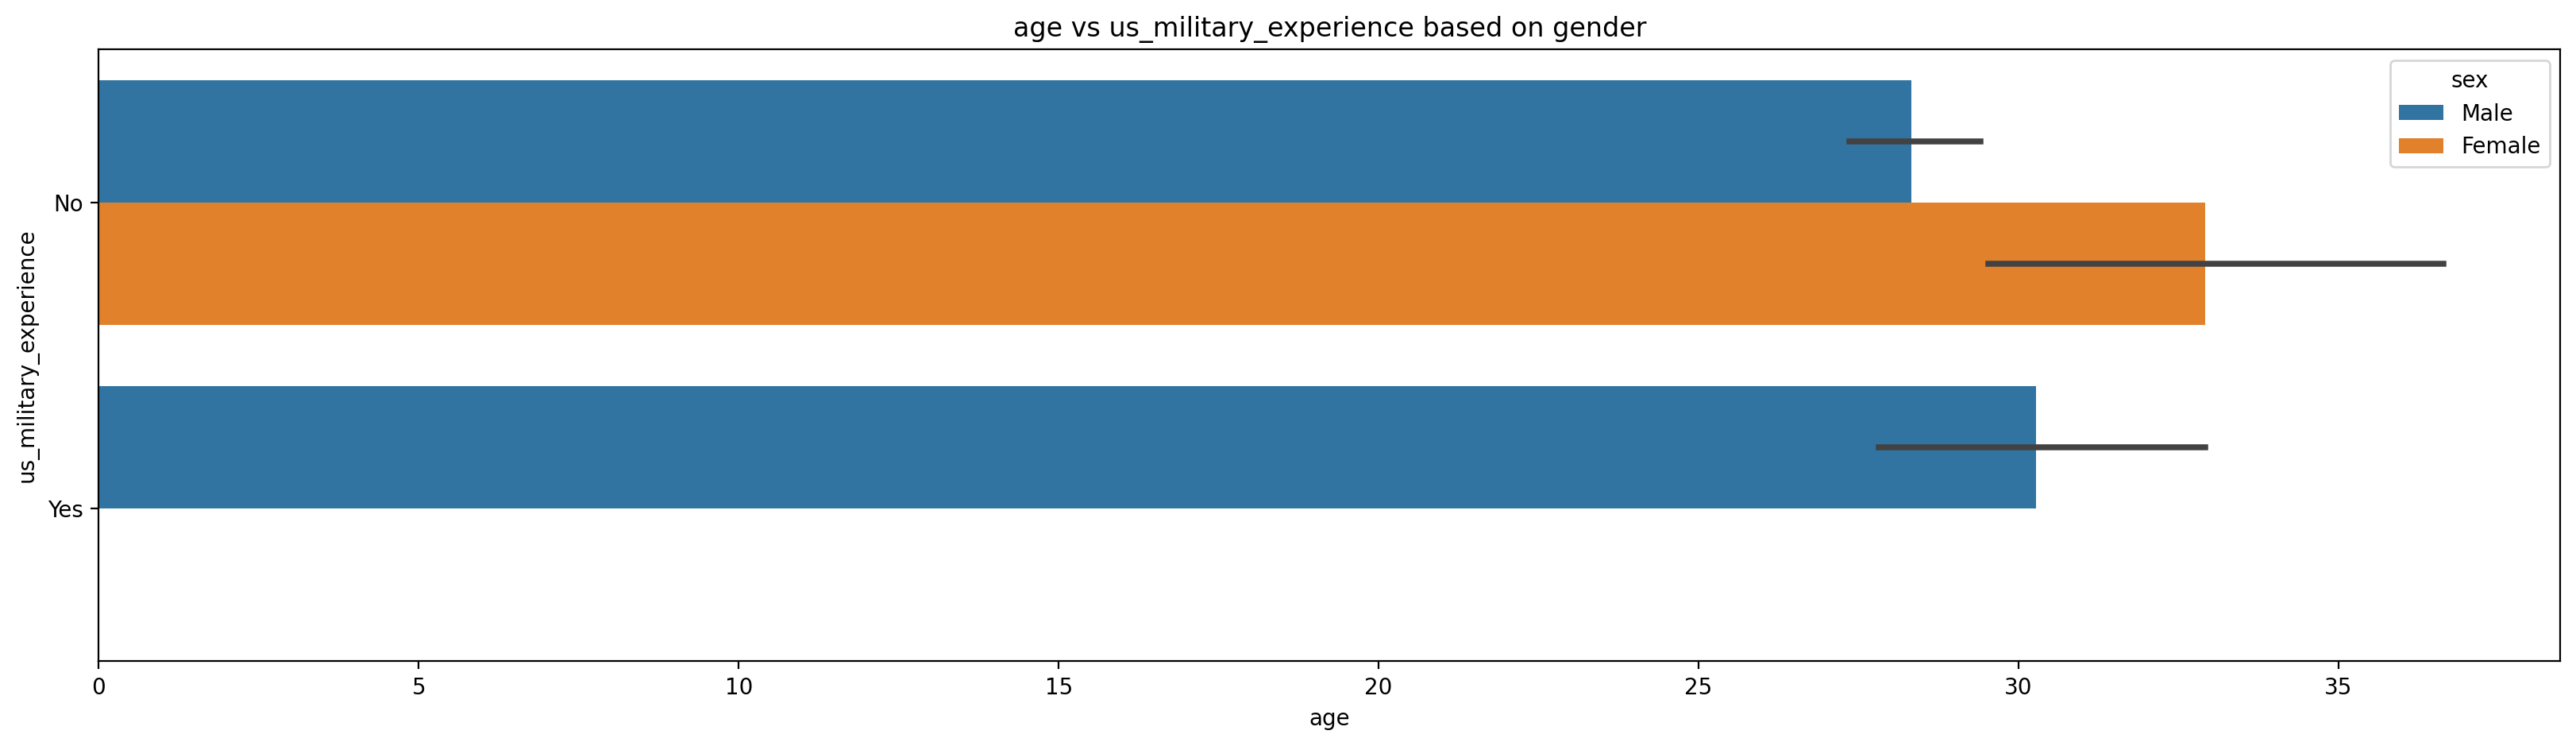

In [107]:
plt.figure(figsize=(20,5),dpi=200)
sns.barplot(x='age',y='us_military_experience',data=df,hue='sex')
plt.title('age vs us_military_experience based on gender')
plt.show()

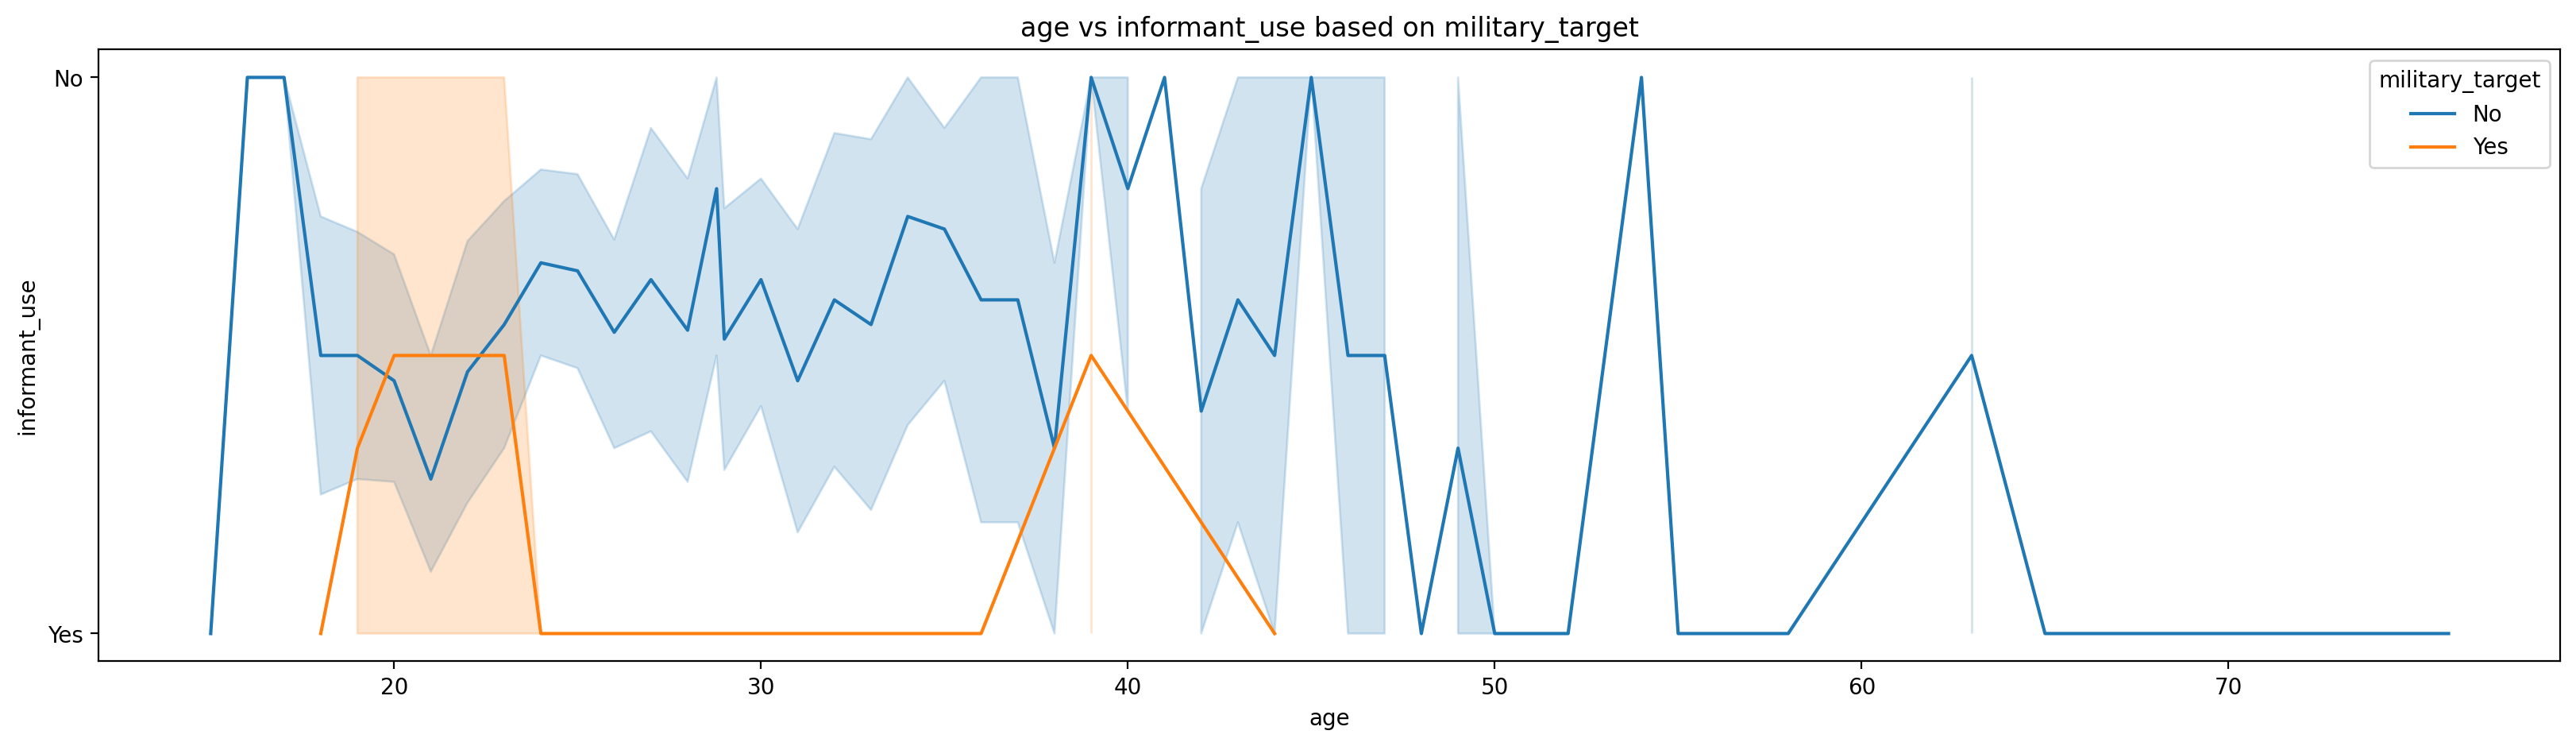

In [105]:
plt.figure(figsize=(20,5),dpi=200)
sns.lineplot(x='age',y='informant_use',data=df,hue='military_target')
plt.title('age vs informant_use based on military_target')
plt.show()

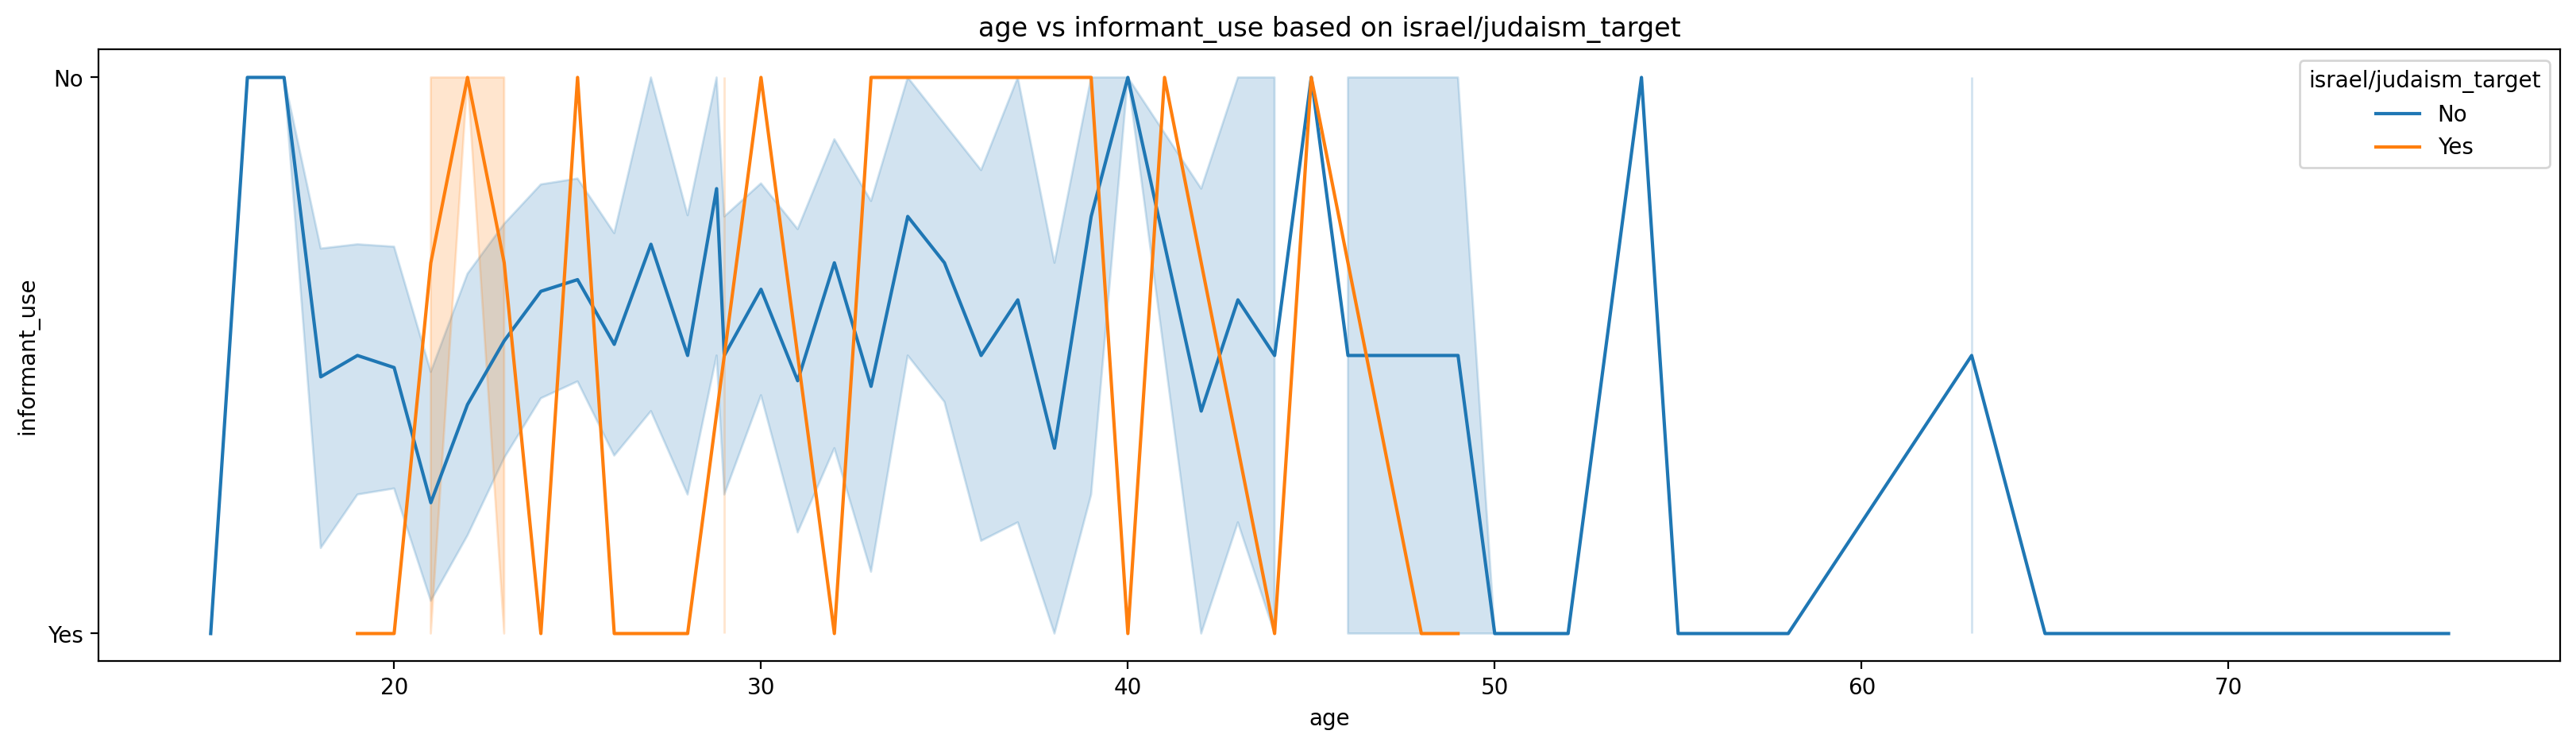

In [104]:
plt.figure(figsize=(20,5),dpi=200)
sns.lineplot(x='age',y='informant_use',data=df,hue='israel/judaism_target')
plt.title('age vs informant_use based on israel/judaism_target')
plt.show()